### CMB Assigment 2 Program ###

In [1]:
# Program, run imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
import requests
sns.set(style="darkgrid")

Create Pandas Dataframe

In [2]:
#df = pd.read_csv("data/21-12-23_complete.csv")
# data_folder = "/Users/Fabian/Desktop/"
data_folder = "../raspberry/dumps/"
df = pd.read_csv(data_folder + "dump-16.01.csv", encoding = "latin")
print(df)
# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info', 'dst port']


               No.                        Time  \
0                1  2022-01-16 14:02:23.352614   
1                2  2022-01-16 14:02:23.357937   
2                3  2022-01-16 14:02:23.388606   
3                4  2022-01-16 14:02:23.396945   
4                5  2022-01-16 14:02:23.414266   
...            ...                         ...   
10322383  10322384  2022-01-17 14:02:22.229144   
10322384  10322385  2022-01-17 14:02:22.229290   
10322385  10322386  2022-01-17 14:02:22.229441   
10322386  10322387  2022-01-17 14:02:22.239232   
10322387  10322388  2022-01-17 14:02:22.239344   

                                         Source  \
0                                192.168.178.27   
1                                192.168.178.26   
2                                192.168.178.24   
3                                192.168.178.26   
4                             Raspberr_bc:1b:41   
...                                         ...   
10322383  2003:c1:3720:f300:e4ba:9189:6edd

Filter local traffic

In [5]:
# source and destination should not start with 192.168 to filter local network
filtered = df.loc[~df['Source'].str.startswith("192.168", na=False) & df['Destination'].str.startswith("192.168", na=False) |
                 df['Source'].str.startswith("192.168", na=False) & ~df['Destination'].str.startswith("192.168", na=False)]
df = filtered.copy()
print(df)

               No.                        Time          Source  \
110            111  2022-01-16 14:02:28.211293   192.168.178.1   
113            114  2022-01-16 14:02:28.212313   192.168.178.1   
115            116  2022-01-16 14:02:28.212922   192.168.178.1   
118            119  2022-01-16 14:02:28.213851   192.168.178.1   
121            122  2022-01-16 14:02:28.214768   192.168.178.1   
...            ...                         ...             ...   
10322156  10322157  2022-01-17 14:02:21.985711  192.168.178.26   
10322157  10322158  2022-01-17 14:02:21.997046         8.8.8.8   
10322158  10322159  2022-01-17 14:02:22.002161         8.8.8.8   
10322203  10322204  2022-01-17 14:02:22.084553  157.240.223.61   
10322354  10322355  2022-01-17 14:02:22.193210  157.240.223.61   

             Destination Protocol  Length  \
110          224.0.0.251     MDNS      75   
113          224.0.0.251     MDNS      96   
115          224.0.0.251     MDNS      70   
118          224.0.0.251   

In [6]:
# helper functions
def utcEntryToTimestamp(entry):
    if '.' in entry:
        row_entry = entry.split(".")[0]
    else:
        row_entry = entry.split(",")[0]
    TIME_FORMAT='%Y-%m-%d %H:%M:%S'
    ts = int(datetime.strptime(row_entry, TIME_FORMAT).timestamp())
    return ts

def utcRowToTimestamp(row):
    return utcEntryToTimestamp(row.at['Time'])
utcRowToTimestamp(df.iloc[0])
# print(df.loc[0].at['Time'])

1642338148

### Protocol packet distribution ###

Protocol
CLASSIC-STUN                  18
DNS                        22089
ESP                          616
HTTP                       10664
HTTP/JSON                   1288
HTTP/JSON/XML                  1
HTTP/XML                      33
ICMP                       10932
IGMPv2                      1288
IGMPv3                      7008
ISAKMP                      2566
MDNS                       53355
MP4                          749
MPTCP                       2464
NTP                         1400
OCSP                          17
QUIC                        9374
SSDP                        7489
SSH                            2
SSHv2                        201
SSL                          145
SSLv2                         26
SSLv3                          7
STUN                           7
TCP                      1624184
TLSv1                      27662
TLSv1.2                   121864
TLSv1.3                    78048
TPLINK-SMARTHOME/JSON       1438
UDP                      1507133
U

/var/folders/t7/_0df6qfn3ndgslssbqchdtnr0000gn/T/ipykernel_2798/1857181538.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


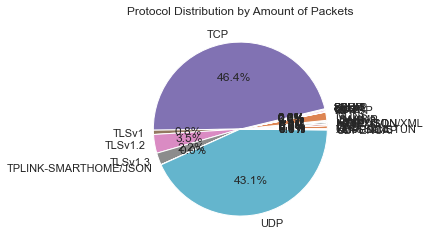

In [7]:
print(df.groupby('Protocol').Source.count())

count_protocol_packets = df.groupby('Protocol').Source.count()

fig, ax = plt.subplots()
plt.title('Protocol Distribution by Amount of Packets')
ax.pie(count_protocol_packets, labels=count_protocol_packets.keys(), autopct='%1.1f%%',)
fig.show()

### Amount of data traffic per protocol ###

Protocol
CLASSIC-STUN                   1440
DNS                         2192969
ESP                          244560
HTTP                       13948977
HTTP/JSON                    833868
HTTP/JSON/XML                   592
HTTP/XML                      22724
ICMP                        1419630
IGMPv2                        59304
IGMPv3                       447520
ISAKMP                       339549
MDNS                       16616037
MP4                          511973
MPTCP                        385343
NTP                          126000
OCSP                          13995
QUIC                        7336067
SSDP                        2910032
SSH                            1732
SSHv2                        275212
SSL                           60975
SSLv2                         32051
SSLv3                          2466
STUN                            854
TCP                      1415411155
TLSv1                      23482554
TLSv1.2                    55222316
TLSv1.3            

/var/folders/t7/_0df6qfn3ndgslssbqchdtnr0000gn/T/ipykernel_2798/3895533642.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


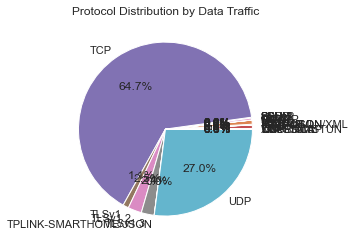

In [8]:
count_protocol_traffic = df.groupby('Protocol').Length.sum()
print(count_protocol_traffic)
fig, ax = plt.subplots()
plt.title('Protocol Distribution by Data Traffic')
ax.pie(count_protocol_traffic, labels=count_protocol_traffic.keys(), autopct='%1.1f%%',)
fig.show()

### Average Data length per Protocol Type ###

Protocol
CLASSIC-STUN               80.000000
DNS                        99.278781
ESP                       397.012987
HTTP                     1308.043605
HTTP/JSON                 647.413043
HTTP/JSON/XML             592.000000
HTTP/XML                  688.606061
ICMP                      129.860044
IGMPv2                     46.043478
IGMPv3                     63.858447
ISAKMP                    132.326189
MDNS                      311.424178
MP4                       683.542056
MPTCP                     156.389205
NTP                        90.000000
OCSP                      823.235294
QUIC                      782.597290
SSDP                      388.574175
SSH                       866.000000
SSHv2                    1369.213930
SSL                       420.517241
SSLv2                    1232.730769
SSLv3                     352.285714
STUN                      122.000000
TCP                       871.459856
TLSv1                     848.910202
TLSv1.2                   453

/var/folders/t7/_0df6qfn3ndgslssbqchdtnr0000gn/T/ipykernel_2798/212732153.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


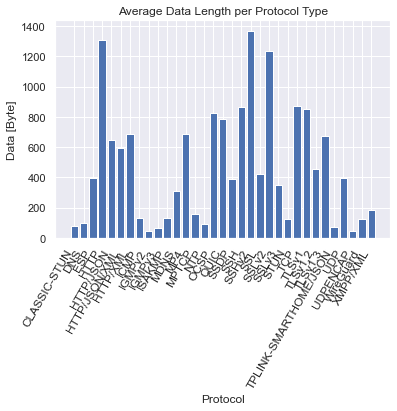

In [9]:
average_protocol_packet_length = df.groupby('Protocol').Length.sum() / df.groupby('Protocol').Length.count()
print(average_protocol_packet_length)
fig, ax = plt.subplots()
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='x', which='minor', labelsize=12)
plt.xlabel('Protocol')
plt.ylabel('Data [Byte]')
plt.title('Average Data Length per Protocol Type')
ax.bar(average_protocol_packet_length.keys(), average_protocol_packet_length, align='center',)
plt.xticks(rotation=60, ha="right")
fig.show()

### Source addresses ###

In [10]:
print(df.groupby('Source').Time.count())
print(df.groupby('Destination').Time.count().sort_values())

unique_dests = df['Destination'].unique()

# write ip address destinations to file
file1 = open("Testfile.txt","w")
for row in unique_dests:
    file1.write(row + "\n")
file1.close()

Source
100.20.184.94        6
100.24.140.84       25
100.25.95.121       41
100.26.12.76         9
102.132.100.39      12
                  ... 
99.84.85.26       3079
99.84.91.123         2
99.84.94.11         18
99.84.94.95        167
99.86.154.46        14
Name: Time, Length: 1675, dtype: int64
Destination
17.253.55.201           1
172.66.43.69            1
17.171.98.2             1
51.77.65.171            1
3.64.117.201            1
                   ...   
192.168.178.62     155388
192.168.178.44     198789
134.224.101.38     248261
192.168.178.26     663010
192.168.178.60    1324635
Name: Time, Length: 1678, dtype: int64


In [11]:
print(df.groupby('Source').Time.count())
print(df.groupby('Destination').Time.count().sort_values())

Source
100.20.184.94        6
100.24.140.84       25
100.25.95.121       41
100.26.12.76         9
102.132.100.39      12
                  ... 
99.84.85.26       3079
99.84.91.123         2
99.84.94.11         18
99.84.94.95        167
99.86.154.46        14
Name: Time, Length: 1675, dtype: int64
Destination
17.253.55.201           1
172.66.43.69            1
17.171.98.2             1
51.77.65.171            1
3.64.117.201            1
                   ...   
192.168.178.62     155388
192.168.178.44     198789
134.224.101.38     248261
192.168.178.26     663010
192.168.178.60    1324635
Name: Time, Length: 1678, dtype: int64


### DNS requests ###

In [12]:
df_dns = df[df['Protocol'].isin(['DNS'])]
df_dns.head()
df_dns_requests_1 = df_dns[df_dns['Info'].str.contains('Standard query')]
# does not contain response
df_dns_requests_2 = df_dns_requests_1[~df_dns_requests_1['Info'].str.contains('response')]
df_dns_resources = df_dns_requests_2['Info'].apply(lambda x: x.split(' ')[-1]).value_counts()
print(df_dns_resources)
# print(df_dns_requests)
# print(df_dns['Info'])


www.google.com                     5063
ccp-lh.googleusercontent.com       2704
clients3.google.com                 488
time.google.com                     354
play.googleapis.com                 221
                                   ... 
doh.dns.apple.com.v.aaplimg.com       1
d145e4fdyl6drh.cloudfront.net         1
calendars.fe.apple-dns.net            1
app.slack.com                         1
e4805.dsca.akamaiedge.net             1
Name: Info, Length: 159, dtype: int64


### IP Wordlwide location

In [13]:
df_destinations =  df['Destination'].unique()

for dest in df_destinations[:10]: # 10 entries limit for now
    if dest.startswith("192.168"):
            continue
    headers = { 'User-Agent': "keycdn-tools:https://www.example.com" }
    url = "https://tools.keycdn.com/geo.json?host={}".format(dest)
    r = requests.get(url, headers=headers)
    print(r.json() )  


{'status': 'success', 'description': 'Data successfully received.', 'data': {'geo': {'host': '224.0.0.251', 'ip': '224.0.0.251', 'rdns': '224.0.0.251', 'asn': '', 'isp': '', 'country_name': '', 'country_code': '', 'region_name': '', 'region_code': '', 'city': '', 'postal_code': '', 'continent_name': '', 'continent_code': '', 'latitude': '', 'longitude': '', 'metro_code': '', 'timezone': '', 'datetime': ''}}}
{'status': 'success', 'description': 'Data successfully received.', 'data': {'geo': {'host': '224.0.0.22', 'ip': '224.0.0.22', 'rdns': 'igmp.mcast.net', 'asn': '', 'isp': '', 'country_name': '', 'country_code': '', 'region_name': '', 'region_code': '', 'city': '', 'postal_code': '', 'continent_name': '', 'continent_code': '', 'latitude': '', 'longitude': '', 'metro_code': '', 'timezone': '', 'datetime': ''}}}
{'status': 'success', 'description': 'Data successfully received.', 'data': {'geo': {'host': '8.8.8.8', 'ip': '8.8.8.8', 'rdns': 'dns.google', 'asn': 15169, 'isp': 'GOOGLE', '

### Data traffic over time ###

In [ ]:
def timeMapping(x):
    # include time difference UTC+1
    time = datetime.utcfromtimestamp(x*min_15_duration + 3600)
    if time.minute == 0 and time.hour % 3 == 0:
        return time.strftime("%H:%M")
    else:
        return ""

# find first and last timestamp, then create data structure
min_15_duration = 60 * 15
df_time_mod = df.copy()
df_time_mod['Time'] = df_time_mod['Time'].apply(lambda x: utcEntryToTimestamp(x)) # map to 15 min window
df_time_mod.head()
first_entry = df_time_mod.iloc[0].at['Time'] // min_15_duration
last_entry = df_time_mod.iloc[-1].at['Time'] // min_15_duration

print('from ', df_time_mod.iloc[0].at['Time'], " to ", df_time_mod.iloc[-1].at['Time'])

count_packets = np.zeros(last_entry - first_entry + 1)
length_packets = np.zeros(last_entry - first_entry + 1)

x_values_packets = list(range(first_entry, last_entry + 1))
print(len(x_values_packets))

mapping_res = list(map(timeMapping, x_values_packets))

# print(mapping_res)

for index, row in df_time_mod.iterrows():
    ts = row.at['Time'] // min_15_duration
    count_packets[ts - first_entry] += 1
    length_packets[ts - first_entry] += row.at['Length']

length_packets = length_packets // 1000
print(count_packets)
print(length_packets)

fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Packets')
plt.title('Packets per timeframe (15 min interval)')
plt.xticks(x_values_packets, mapping_res)
ax.bar(x_values_packets, count_packets, color='black')
fig.show()

fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Data [kB]')
plt.title('Data traffic per timeframe (15 min interval)')
plt.xticks(x_values_packets, mapping_res)
ax.bar(x_values_packets, length_packets, color='black')
fig.show()

from  1642338148  to  1642424542
97
